In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers , models , optimizers
import cv2
import pandas as pd
from keras.callbacks import ModelCheckpoint , EarlyStopping
import time
import os
import datetime

In [2]:
Path1 = 'D:/Data/Face Data/FaceNeg/'
Path2 = 'D:/Data/Face Data/FacePos/'
X_train = []
Y_train = []
ht = 75
#ImgSize = 300

In [3]:
try :
    print(Path1)
    for i in os.listdir(Path1) :
        print(f'\r\t{i}\t',end="")
        img = cv2.imread(Path1+i)
        img = cv2.resize(img,(ht,ht))
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        #mask = cv2.inRange(img,np.array([2,50,60]),np.array([25,150,255]))
        #res = cv2.bitwise_and(img,img,mask=mask)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #img = cv2.GaussianBlur(img,(5,5),0)
        X_train.append(img/255.)
        Y_train.append(0)
    print('\n')
    print(Path2)
    FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    for i in os.listdir(Path2) :
        print(f'\r\t{i}\t',end="")
        img = cv2.imread(Path2+i)
        #img = cv2.resize(img,(ImgSize,ImgSize))
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        #mask = cv2.inRange(img,np.array([2,50,60]),np.array([25,150,255]))
        #res = cv2.bitwise_and(img,img,mask=mask)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #img = cv2.GaussianBlur(img,(5,5),0)
        faces = FaceCascade.detectMultiScale(img, 1.3, 5)
        for (x,y,w,h) in faces :
            img = img[y:y+h , x:x+w]
            img = cv2.resize(img,(ht,ht))
            X_train.append(img/255.)
            Y_train.append(1)
except :
    pass

D:/Data/Face Data/FaceNeg/
	UMD_106_24x24.pgm		

D:/Data/Face Data/FacePos/
	real_00737.jpg		

In [4]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')

In [5]:
print(f'[*] train : {X_train.shape} , test : {Y_train.shape}')

[*] train : (48926, 75, 75) , test : (48926,)


In [6]:
def load_model() :
    model = models.Sequential()
    model.add(layers.Conv1D(64,1,input_shape=X_train[0].shape,activation='relu'))
    model.add(layers.Conv1D(64,1,activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128,1,activation='relu'))
    model.add(layers.Conv1D(128,1,activation='relu'))
    model.add(layers.Conv1D(128,1,activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(256,1,activation='relu'))
    model.add(layers.Conv1D(256,1,activation='relu'))
    model.add(layers.Conv1D(256,1,activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(512,1,activation='relu'))
    model.add(layers.Conv1D(512,1,activation='relu'))
    model.add(layers.Conv1D(512,1,activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(512,1,activation='relu'))
    model.add(layers.Conv1D(512,1,activation='relu'))
    model.add(layers.Conv1D(512,1,activation='relu'))
    model.add(layers.Conv1D(512,1,activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dropout(.25))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

In [7]:
model = load_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 75, 64)            4864      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 75, 64)            4160      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 37, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 37, 128)           8320      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 37, 128)           16512     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 37, 128)           16512     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 128)           0

In [8]:
epochs=100
ModelName = 'Object Detection 1(.0).hdf5'
checkpoint = ModelCheckpoint(ModelName, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
history=model.fit(X_train,Y_train,
                  validation_split=.25,
                  epochs=epochs,
                  shuffle=True,
                  callbacks=[checkpoint , early])
model.save(ModelName)

Epoch 1/100
1147/1147 [==============================] - ETA: 0s - loss: 0.2736 - accuracy: 0.8930
Epoch 00001: val_loss improved from inf to 0.10204, saving model to Object Detection 1(.0).hdf5
1147/1147 [==============================] - 13s 12ms/step - loss: 0.2736 - accuracy: 0.8930 - val_loss: 0.1020 - val_accuracy: 0.9696
Epoch 2/100
1141/1147 [============================>.] - ETA: 0s - loss: 0.2264 - accuracy: 0.9169
Epoch 00002: val_loss improved from 0.10204 to 0.03657, saving model to Object Detection 1(.0).hdf5
1147/1147 [==============================] - 11s 9ms/step - loss: 0.2261 - accuracy: 0.9170 - val_loss: 0.0366 - val_accuracy: 0.9935
Epoch 3/100
1147/1147 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9550
Epoch 00003: val_loss improved from 0.03657 to 0.03483, saving model to Object Detection 1(.0).hdf5
1147/1147 [==============================] - 11s 9ms/step - loss: 0.1276 - accuracy: 0.9550 - val_loss: 0.0348 - val_accuracy: 0.9905
Epoc

1147/1147 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9895
Epoch 00028: val_loss did not improve from 0.00359
1147/1147 [==============================] - 10s 8ms/step - loss: 0.0306 - accuracy: 0.9895 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 29/100
1143/1147 [============================>.] - ETA: 0s - loss: 0.0312 - accuracy: 0.9894
Epoch 00029: val_loss did not improve from 0.00359
1147/1147 [==============================] - 10s 8ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.0499 - val_accuracy: 0.9814
Epoch 30/100
1146/1147 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9896
Epoch 00030: val_loss did not improve from 0.00359
1147/1147 [==============================] - 10s 8ms/step - loss: 0.0282 - accuracy: 0.9896 - val_loss: 0.0095 - val_accuracy: 0.9970
Epoch 31/100
1141/1147 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9897
Epoch 00031: val_loss did not improve from 0.00359
1147/11

Epoch 57/100
1143/1147 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9925
Epoch 00057: val_loss did not improve from 0.00359
1147/1147 [==============================] - 11s 9ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0229 - val_accuracy: 0.9934
Epoch 58/100
1142/1147 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9947
Epoch 00058: val_loss did not improve from 0.00359
1147/1147 [==============================] - 11s 9ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0081 - val_accuracy: 0.9981
Epoch 59/100
1142/1147 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9912
Epoch 00059: val_loss did not improve from 0.00359
1147/1147 [==============================] - 11s 10ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0110 - val_accuracy: 0.9966
Epoch 60/100
1141/1147 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9948
Epoch 00060: val_loss did not improve from 0

Epoch 86/100
1141/1147 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9959
Epoch 00086: val_loss did not improve from 0.00359
1147/1147 [==============================] - 11s 10ms/step - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.0279 - val_accuracy: 0.9953
Epoch 87/100
1145/1147 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9958
Epoch 00087: val_loss did not improve from 0.00359
1147/1147 [==============================] - 11s 9ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0947 - val_accuracy: 0.9772
Epoch 88/100
1147/1147 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9963
Epoch 00088: val_loss did not improve from 0.00359
1147/1147 [==============================] - 10s 9ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0060 - val_accuracy: 0.9984
Epoch 89/100
1144/1147 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9942
Epoch 00089: val_loss did not improve from 0

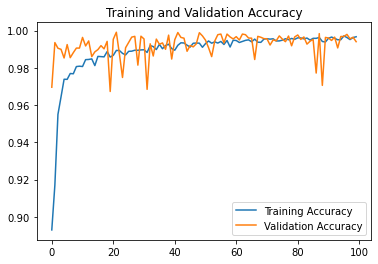

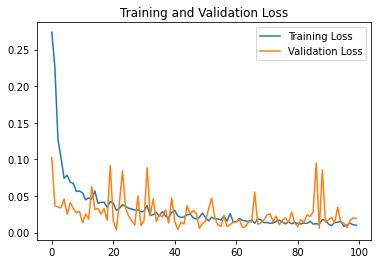

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
model = models.load_model('Face Detection 1(.0).hdf5')

In [11]:
def showImg(img) :
    plt.imshow(img,cmap='gray')
    plt.show()

In [12]:
def drawRect(img,i,j,k,l,label) :
    img =  cv2.rectangle(img, (i,j), (k,l) , (100,200,10), 2)
    return cv2.putText(img, label , (i, j-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

In [13]:
def PredVal(img,ht=ht) :
    Image = []
    img = cv2.resize(img,(ht,ht))
    Image.append(img/255.)
    Image = np.array(Image)
    Image = Image.astype('float32')
    pred = model.predict(Image)
    predCla = model.predict_classes(Image)
    return (max(pred[0]) , predCla[0][0])

In [14]:
predClass = {}
for i in range(2) :
    predClass[f'{i}'] = [[] , [] , [] , [] , []]
    
print(predClass)

{'0': [[], [], [], [], []], '1': [[], [], [], [], []]}


In [15]:
size = 300 # 600
step = 50
img = cv2.imread('D:/Data/TestData/DP.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
res = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(res,(5,5),0)
img = cv2.resize(img,(size,size))
CoOrd = pd.read_csv('CoOrd.csv')
for i,j,k,l in zip(CoOrd['i'],CoOrd['j'],CoOrd['k'],CoOrd['l']) :
    print(f'\r\t{i}\t{j}\t{k}\t{l}\t\t',end="")
    try :
        imag = img[j:l,i:k]
        pred,cla = PredVal(imag)
        predClass[f'{cla}'][0].append(i)
        predClass[f'{cla}'][1].append(j)
        predClass[f'{cla}'][2].append(k)
        predClass[f'{cla}'][3].append(l)
        predClass[f'{cla}'][4].append(pred)
        
    except Exception as e :
        print(e)

	10	10	70	70		WARNING:tensorflow:From <ipython-input-13-bb913c64dbce>:8: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
	190	190	250	250		

Face 0.9992859


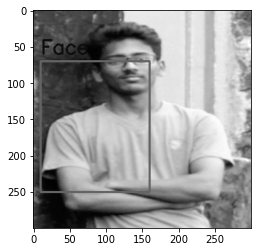

Face 0.9999995


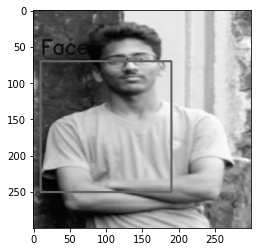

Face 0.9972166


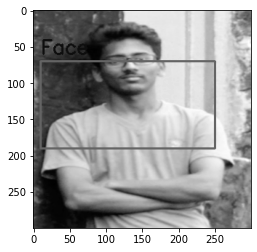

Face 0.99990356


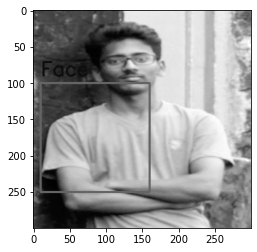

Face 0.9991698


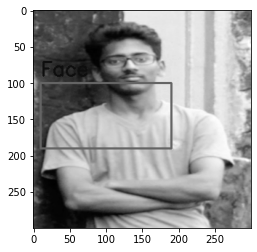

Face 0.9999274


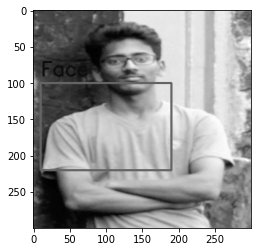

Face 1.0


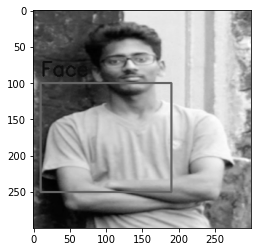

Face 0.9994992


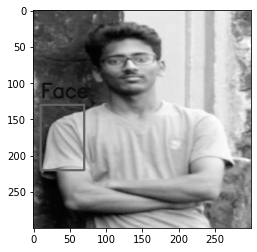

Face 0.9999639


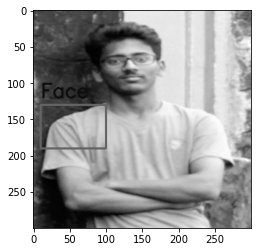

Face 0.99998796


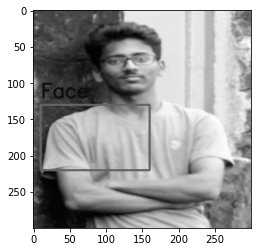

Face 0.9999814


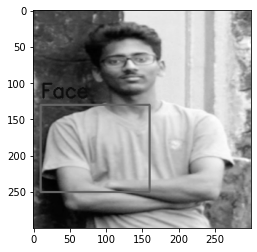

Face 0.99798846


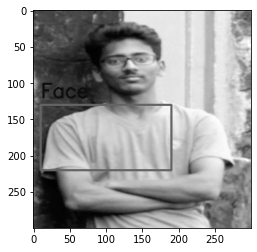

Face 0.9999975


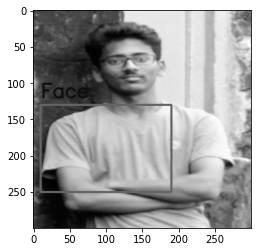

Face 0.9995204


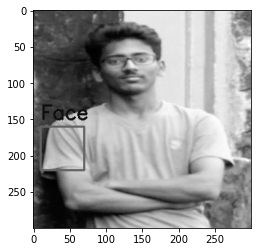

Face 0.99996424


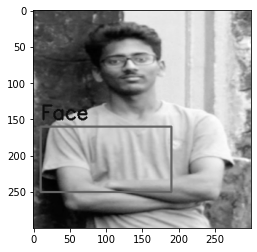

Face 0.9979778


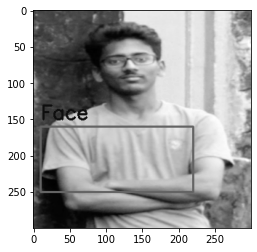

Face 0.99977213


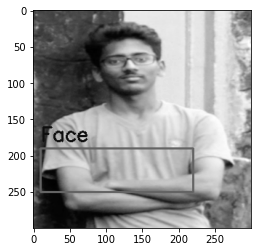

Face 1.0


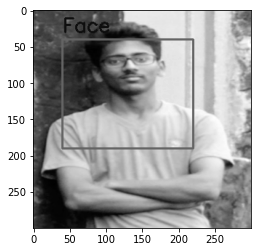

Face 0.9999939


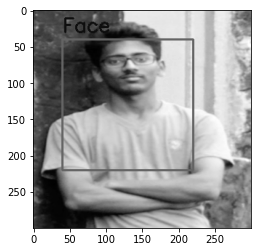

Face 0.99999607


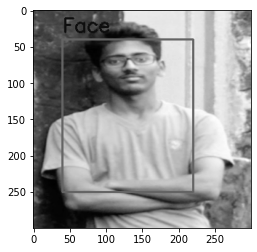

Face 0.99757844


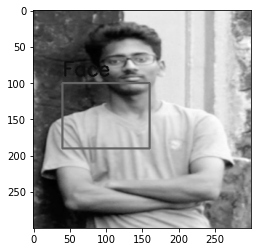

Face 0.9972222


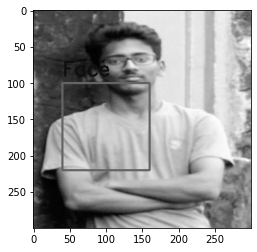

Face 0.99997604


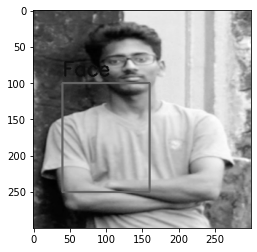

Face 0.99968743


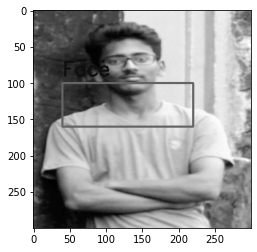

Face 0.99842787


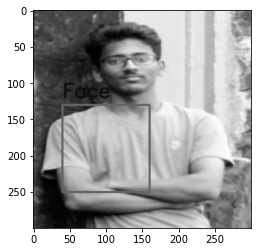

Face 0.99762017


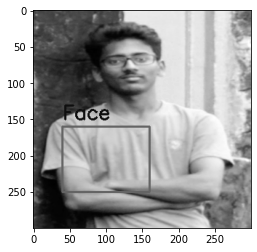

Face 0.99935025


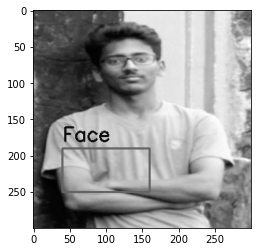

Face 0.9999664


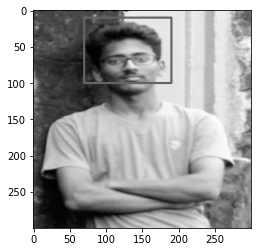

Face 0.9997286


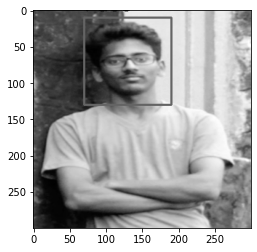

Face 0.99991095


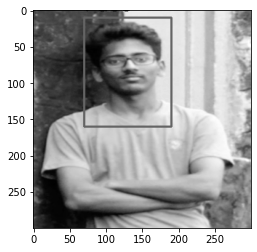

Face 0.9999777


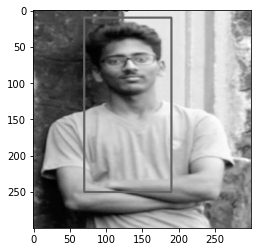

Face 0.9984693


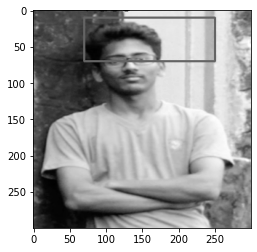

Face 0.9999988


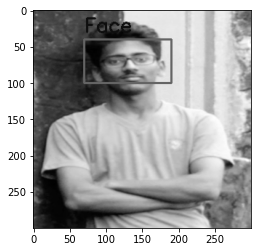

Face 0.999648


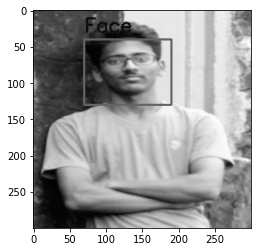

Face 0.99999976


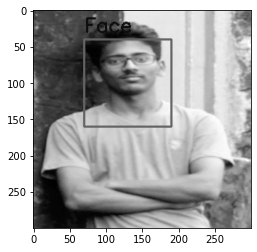

Face 0.9999976


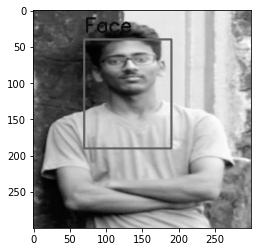

Face 0.9999739


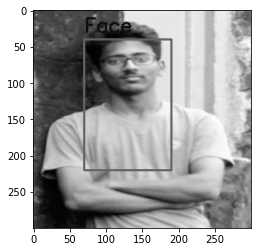

Face 0.99977773


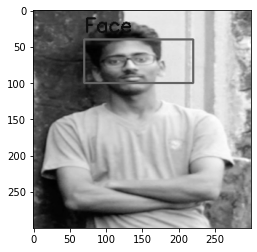

Face 0.9999999


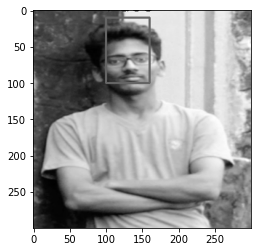

Face 0.9999999


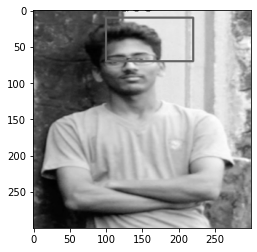

Face 0.99998915


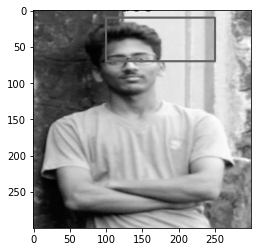

Face 1.0


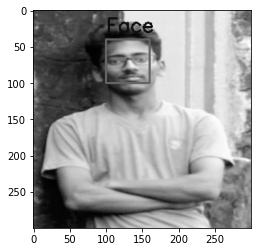

Face 1.0


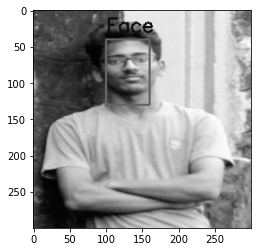

Face 0.9999932


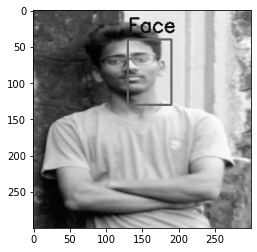

Face 0.9987269


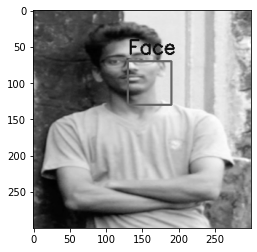

In [16]:
for a in range(len(predClass['0'][0])) :
    try :
        if predClass['1'][4][a] >= 0.997 :
            im = img.copy()
            i,j,k,l = predClass['1'][0][a] , predClass['1'][1][a] , predClass['1'][2][a] , predClass['1'][3][a]
            im = drawRect(im,i,j,k,l,'Face')
            print('Face' , predClass['1'][4][a])
            showImg(im)
    except :
        pass

In [17]:
predClass

{'0': [[10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
   10,
 

In [44]:
def Detect_Location(img,step=20,win_w=30,win_h=30,minPred=0.99) :
    img_w,img_h = img.shape[:2]
    res = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    OrgImg = img.copy()
    OrgImage = OrgImg.copy()
    img = cv2.GaussianBlur(res,(5,5),0)
    modes = [(2,2),(2,3),(3,2),(3,3),(3,4),(4,3),(4,4)]
    maxPred = minPred
    area = 150
    LX1 , LY1 , LX2 , LY2 = -1 , -1 , -1 , -1
    for i in range(0,img_w,step) :
        for j in range(0,img_h,step) :
            for m in modes :
                w , h = win_w*m[0] , win_h*m[1]
                X1 , Y1 , X2 , Y2 = int(i-(h/2)) , int(j-(w/2)) , int(i+(h/2)) , int(j+(w/2))
                if X1 > 0 and Y1 > 0 and X2 < img_w and Y2 < img_h :
                    print(f'\r({X1,Y1})({X2,Y2})\t\t',end="")
                    try :
                        im = img[Y1:Y2,X1:X2]
                        OrgImage = OrgImg.copy()
                        pred = PredVal(im)[0]
                        if pred >= maxPred :
                            if pred == maxPred :
                                if w*h >= area :
                                    LX1 , LY1 , LX2 , LY2 = X1 , Y1 , X2 , Y2
                                    area = w * h
                            else :
                                maxPred = pred
                                LX1 , LY1 , LX2 , LY2 = X1 , Y1 , X2 , Y2
                            '''im = drawRect(OrgImage,X1,Y1,X2,Y2,'Face')
                            plt.title(f'({X1,Y1})({X2,Y2}) - {pred}')
                            plt.imshow(im)
                            plt.show()'''
                        elif pred <= 0.7 :
                            break
                    except :
                        pass  
    if LX1 != -1 :
        im = drawRect(OrgImage,LX1,LY1,LX2,LY2,'Face')
        plt.title(f'({LX1,LY1})({LX2,LY2}) - {maxPred}')
        plt.imshow(im)
        plt.show()
    else :
        plt.imshow(OrgImage)
        plt.show()

In [45]:
ImgSize = 200

((130, 130))((190, 190))		

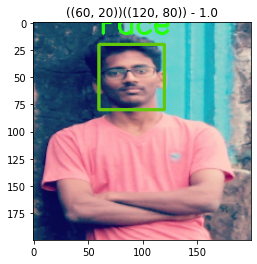


0:00:13.349194


In [46]:
img = cv2.imread('D:/Data/TestData/DP.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
start = datetime.datetime.now()
img = cv2.resize(img,(ImgSize,ImgSize))
Detect_Location(img,step=10)
print(f'\n{datetime.datetime.now() - start}')

((130, 130))((190, 190))		

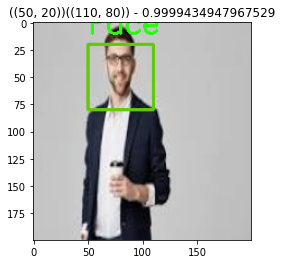


0:00:13.631792


In [48]:
img = cv2.imread('D:/Data/TestData/Person1.jfif')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
start = datetime.datetime.now()
img = cv2.resize(img,(ImgSize,ImgSize))
Detect_Location(img,step=10)
print(f'\n{datetime.datetime.now() - start}')

((130, 130))((190, 190))		

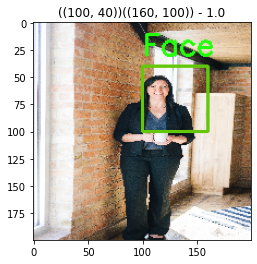


0:00:15.646699


In [51]:
img = cv2.imread('D:/Data/TestData/FullPerson.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
start = datetime.datetime.now()
img = cv2.resize(img,(ImgSize,ImgSize))
Detect_Location(img,step=10)
print(f'\n{datetime.datetime.now() - start}')